## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [44]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [45]:
df.shape

(294478, 5)

Our dataset has 294478 rows and 5 columns.

c. The number of unique users in the dataset.

In [46]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [47]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [48]:
no_match = df.query('(group == "treatment" and landing_page != "new_page") or  (group != "treatment" and landing_page == "new_page")').shape[0]
print(no_match)

3893


f. Do any of the rows have missing values?

In [49]:
(no_match == 0)

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [50]:
match=df.query('(group == "treatment" and landing_page == "new_page") or  (group == "control" and landing_page == "old_page")').shape[0]
print(match)

290585


In [51]:
df2 = df.query('group == "treatment" and landing_page =="new_page" or group == "control" and landing_page =="old_page"')

In [52]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [53]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [55]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

The repeated record is the user with user_id 773192, who is in the treatment group, receives a new page but did not convert.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [56]:
df2 = df2.drop_duplicates(subset = 'user_id', keep = 'first')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [57]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [58]:
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [60]:
(df2.landing_page=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The probability of converting regardless of the page the users received is approximately 11.9%. The probability of receiving the new page is 50 %.
According to our results, we can see there isn't sufficient evidence to conclude that the new treatment page leads to more conversions.  We can see that the probability of converting in the treatment group is less than in the control group. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0:    **$p_{new}$** ≤ **$p_{old}$**

H1:    **$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [61]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [62]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [63]:
n_new = df2.query('group=="treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [64]:
n_old = df2.query('group=="control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

For drawing samples from a binomial distribution, we'll use NumPy's `random.binomial` function.

In [65]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [66]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [67]:
difference = new_page_converted.mean() - old_page_converted.mean()
difference

-0.00029108443497428971

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [68]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [69]:
p_diffs = np.array(p_diffs)

In [70]:
low,high = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

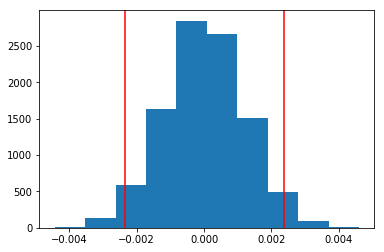

In [71]:
plt.hist(p_diffs)
plt.axvline(x=low, color='red')
plt.axvline(x=high,color='red');

According to the Central Limit Theorem, which states that with a large enough sample size, the sampling distribution of the mean will be normally distributed, we can say the plot looks like as expected. By cutting off the bottom 2.5 and the top 2.5, we built 95% in the middle portion. We can see that most data point fall within this middle portion. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [72]:
actual_control_ctr = df2.query('group=="control"').converted.mean()

In [73]:
actual_treatment_ctr = df.query('group=="treatment"').converted.mean()

In [74]:
observed_diff = actual_treatment_ctr - actual_control_ctr
observed_diff

-0.0014667249355626438

In [75]:
(p_diffs > observed_diff).mean()

0.89190000000000003

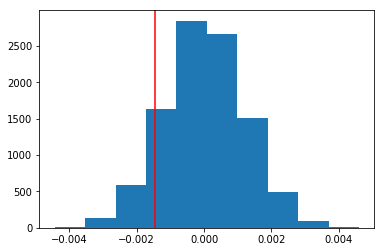

In [76]:
plt.hist(p_diffs)
plt.axvline(x = observed_diff,color='r');

The red line shows where our observed statistic falls.

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In the last section, we computed the p-value for our observed statistic.
P-value is the probability of observing our statistic or (more extreme in favor of the alternative) if the null hypothesis is true.


As we can see, our p-value is approximately 0.9, and that is enough of a chance that we stay with the null hypothesis under 5% Type I Error. We have evidence to suggest that the null hypothesis generated our sample statistic. That means we should stay with our null hypothesis and so there isn't sufficient difference between the old and the new page. 

Based on the data, we fail to reject the Null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
import statsmodels.api as sm
from scipy.stats import norm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.shape[0] - df2.query("landing_page == 'new_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [78]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative="larger")
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [79]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

We used one tail test to compare two proportions and tried to find out whether the new page better compared to the old one. 

The critical z-score values when using a 95 % confidence level are -1.96, and +1.96 standard deviations and the uncorrected p-value associated with a 95 % confidence level is 0.05 
We can see that our z-score of value -1.31 is within this interval and does not exceed the critical value of 1.95, which we computed. Our p-value is larger than 0.05. Therefore we can not reject our null hypothesis, which assumes the old page is more effective or equally effective for converting. 
Our results agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should be performing Logistic regression. This type of regression predicts only two possible outcomes, in our case, whether the user converts or not depending on the new page or the old one.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [80]:
df2['intercept'] = 1
df2[['group_receive_1','ab_page']] = pd.get_dummies(df2['group'])

In [81]:
df2 = df2.drop('group_receive_1',axis = 1)

We built the two new columns: the 'intercept' column and 'ab_page' column using `pd.get_dummies`which is 1 when an individual receives the treatment and 0 if control. 

When we create dummy variables using 0,1 encodings, we always need to make sure our matrices are full rank. That means all columns need to be linearly independent (in order to take the inverse of (X' X). We dropped one column since it has only 0 or 1 value, and the dropped column will become the baseline. The coefficients we obtain from the output of regression are an indication of how the encoded levels compare to the baseline level. 

In [82]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


As we can see, the last column contains encoded values as we wanted.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [83]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [84]:
result = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [86]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 11:22 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In summary we can see our intercept and ab_page, which is the slope.
We can define intercept as the predicted value of the response when the explanatory variable is 0.
The slope is expected change in the response for each unit increase in the explanatory variable.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The null and alternative hypotheses associated with our regression model are:

H0:    **$p_{new}$** = **$p_{old}$**

That means the old page has the same success as the new one.

H1:    **$p_{new}$** != **$p_{old}$**

That means these two pages are not effective in the same way.

These hypotheses are different compared to the hypothesis in **Part II** where we were analyzing different null hypothesis, and so the old page is better than the new one - that was a one-tail test. On the other hand, the regression is a two-tail test, and the p-value is 0.1899, which is more than 0.05. That means we reject the null hypothesis, which assumes the new page has the same effectiveness as the old one regarding the user's converting.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

If we have additional information about users of our webpage such as their gender, age, country where they live, we might be able to see whether conversion rate is better in certain countries or in case of single age categories or between two genders.

But there are some disadvantages when we are analyzing multiple metrics. The more things that we test, the more likely we are to observe significant differences just by chance. This happens when we run evaluations from multiple metrics at the same time. When we have our x-variables, we want them to be correlated with the response but not each other. When x-variables are related to one another, the result can be very misleading, and it can lead to flipped regression from an expected relationship. This correlation between metrics is called multicollinearity.

The approach to finding a relationship among metrics is a visualization of their relationships using seaborn's pair plot. The second way is to compute VIFs, which is variance inflation factors. If VIF is > 10, we have multicollinearity. The standard approach is to remove the ones that are of the least interest.

Two factors that can affect conversion rate:

- change aversion = When existing users may give an unfair advantage to the old   page because they don't want any change

- novelty effect = When existing users may give an unfair advantage to the new page because they want a change and like the new design.

Measuring the right metric is a key component of A/B testing. Using one specific metric alone doesn't have to lead to a successful result in many cases. Also, the short time of running A/B test, for example, three weeks, isn't sufficient because the test wasn't run long enough to allow users to adjust to the change.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [123]:
countries = pd.read_csv('countries.csv')

In [124]:
new_df = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [125]:
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


We look at the unique countries in our new dataset and create dummy variables. One category we will use again as a baseline, and this category will be dropped from our model.

In [126]:
new_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [127]:
new_df[['UK','US','CA']] = pd.get_dummies(new_df['country'])

In [128]:
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


We use 'UK' as our baseline.

In [135]:
new_df['intercept'] = 1

In [136]:
logit_mod_2 = sm.Logit(new_df['converted'], new_df[['intercept','CA','UK']])

In [137]:
result_2 = logit_mod_2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [138]:
result_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 14:28 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
CA           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
UK           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

For the interpretation of coefficients we have to compute exponentiaton each of the coefficients. 

In [162]:
np.exp(-0.0099), np.exp(-0.0507)

(0.99014884368295719, 0.95056379690040338)

Our resulting values are the multiplicative change in the odds.

We could say:

'The conversion of users living in Canada is 0.99 times less likely, as long as all the variables stay the same.'
'The conversion of users living in the United Kingdom is 0.95 times less likely, as long as all the variables stay the same.'

The p-values of coefficients CA and UK are more than 0.05; therefore, they are not statistically significant for predicting the conversion of users regarding countries where they live. It indeed looks like that country where users live does not appear to have an impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

To find out an interaction between page and country, we create interaction terms that belong under Higher older terms, by multiplying two columns by one another. In our model, Lower order terms will be included as well.

In [134]:
new_df['UK_ab_page'] = new_df['UK'] * new_df['ab_page']
new_df['US_ab_page'] = new_df['US'] * new_df['ab_page']
new_df['CA_ab_page'] = new_df['CA'] * new_df['ab_page']

In [145]:
logit_mod_3 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page','US','CA','US_ab_page','CA_ab_page']])

In [146]:
result_3 = logit_mod_3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [147]:
result_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-24 14:46 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
CA_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

As we can see, all coefficients have large p-values that are > 0.05, which means they are not statistically significant for predicting the conversion of users. 
Also, interaction terms don't appear to be statistically significant. 

<a id='conclusions'></a>
## Conclusion

In the first section of **Part II**, we assumed under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the converted success rate regardless of page. For determining if the null is possible, we built sampling distribution and found confidence interval. The p-value was approximately 0.9. Based on the data, we fail to reject the Null hypothesis.

In the second section of **Part II**, we used the test for proportions based on the normal (z) test. Our computed p-value was 0.905 and z-score -1.31. Based on these results, we fail to reject our null hypothesis.

In **Part III**, as we wanted to predict only two possible outcomes, we used Logistic regression. We fit the regression model to see if there is a significant difference in conversion based on which page a user receives.

We included in our model another metric - countries where users live to see whether a country might affect the conversion rate. According to our results, we can say the country doesn't have a significant impact on the conversion of users.

According to these results, we can say that launching a new page would not be lucrative for the company. It is possible that the test has been cut off early, and therefore the results are skewed. On the other hand, it's very debatable that if the test were running for a longer time, the results would be different. 

Perhaps the company should reconsider the design of the new page and implement new changes that would be more attractive and interesting for users, then rerun the test. 




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

Sources
https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/

http://resources.esri.com/help/9.3/arcgisengine/java/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm

https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

https://docs.scipy.org/doc/numpy-1.9.2/reference/generated/numpy.random.binomial.html

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0